# Chicago crime and weather

Let's see if we can combine the data from the previous two sections and analyse them both side by side and see if there is some correlation between temperature and crime rates. (Anyone seen "[Body Heat](https://www.imdb.com/title/tt0082089/)"?)

In [16]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # notice that we're including matplotlibe as well – for some fancier plotting options

## Reading both datasets again

I've gone through the crimes CSV file (using a decent text editor that doesn't crash on huge files, like Emacs) and it turns out we actually haven't gone through all of the 2016 data. The rows are very chaotically ordered. Let's see if we can filter through the file, only select the 2016 data and throw away 
the rest (mainly due to memory constraints of the machines people might want to run these examples on). We're gonna use the `iterator` and `chunksize` options of the `read_csv` function (for such slightly more advanced uses see [the docs](http://pandas.pydata.org/pandas-docs/stable/io.html#csv-text-files)).

First lets define the paths globally, so that later we can skip the serialising step.

In [2]:
crimes_raw_file_path = 'data/chicago_crime/Crimes_-_2001_to_present.csv'
crimes_file_path = 'data/chicago_crime/crimes.csv.gzip'

Processing & serialising the crime data

In [16]:
chunksize = 100000
df_chunks = []

for df in pd.read_csv(crimes_raw_file_path, parse_dates=[2], index_col=[2], chunksize=chunksize, iterator=True):
    df = df.loc['2016-01-01':'2017-01-01']
    df_chunks.append(df)
    
crimes2016 = pd.concat(df_chunks)

# Serialising & compressing the data
crimes2016.sort_index(ascending=True).to_csv(crimes_file_path, compression='gzip')

crimes2016.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2016-06-20 09:00:00,10606686,HZ358366,047XX S INDIANA AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,224,...,3.0,38.0,17,1178398.0,1873627.0,2016,03/01/2018 03:52:35 PM,41.808541,-87.621195,"(41.808540691, -87.621194998)"
2016-11-12 07:30:00,10750326,HZ512286,038XX W 61ST ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,True,False,823,...,13.0,65.0,03,1151816.0,1863880.0,2016,03/01/2018 03:52:35 PM,41.782357,-87.718948,"(41.782356535, -87.718947917)"
2016-05-03 21:08:00,22451,HZ250365,074XX S MAPLEWOOD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,835,...,18.0,66.0,01A,1160663.0,1855290.0,2016,05/10/2016 03:56:50 PM,41.758606,-87.686749,"(41.758606301, -87.686748849)"
2016-05-03 14:00:00,22452,HZ249724,049XX W MONROE ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,False,False,1533,...,28.0,25.0,01A,1143598.0,1899211.0,2016,05/10/2016 03:56:50 PM,41.879467,-87.748196,"(41.879467146, -87.748195577)"
2017-01-01 00:01:00,11227508,JB146365,027XX S WHIPPLE ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,1033,...,12.0,30.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


Now we can quickly deserialise the crimes data.

In [10]:
# parsing weather data and also kick out some unnecessary 2017 values
crimes2016 = pd.read_csv(crimes_file_path, index_col=0, parse_dates=True, compression='gzip')['2016']
crimes2016.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,10956651,JA277470,027XX N PULASKI RD,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,2524,...,30.0,22.0,06,1149253.0,1917891.0,2016,02/10/2018 03:50:01 PM,41.930619,-87.726946,"(41.930619258, -87.726946235)"
2016-01-01,10478256,HZ217384,030XX N HAMLIN AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,True,2523,...,30.0,21.0,20,1150761.0,1919927.0,2016,02/10/2018 03:50:01 PM,41.936177,-87.721351,"(41.936176812, -87.721351222)"
2016-01-01,10479192,HZ218038,012XX S PRAIRIE AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,132,...,2.0,33.0,11,1178107.0,1894643.0,2016,02/10/2018 03:50:01 PM,41.866217,-87.621624,"(41.866216769, -87.621623622)"
2016-01-01,10654040,HZ403662,053XX W CHICAGO AVE,0890,THEFT,FROM BUILDING,OTHER,False,False,1524,...,37.0,25.0,06,1140387.0,1904812.0,2016,02/10/2018 03:50:01 PM,41.894896,-87.759849,"(41.894896457, -87.759848588)"
2016-01-01,11061033,JA394658,110XX S STATE ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,False,513,...,34.0,49.0,02,1178209.0,1831939.0,2016,02/10/2018 03:50:01 PM,41.694148,-87.623150,"(41.694148281, -87.623150288)"


Great! Now that we have the crime data in memory, let's read the weather data – the same way we've already read it in the last section.

In [5]:
weather_file_path = 'data/chicago_weather/weather.csv'

# parsing weather data and also kicking out some unnecessary 2017 values
weather2016 = pd.read_csv(weather_file_path, index_col=0, parse_dates=True)['2016']
weather2016.temperature.head()

2016-01-01 00:00:00   -4.52
2016-01-01 01:00:00   -5.19
2016-01-01 02:00:00   -6.00
2016-01-01 03:00:00   -6.71
2016-01-01 04:00:00   -7.07
Name: temperature, dtype: float64

## Plotting the data side by side

Let's group both datasets to a daily frequency and plot them side-by-side.

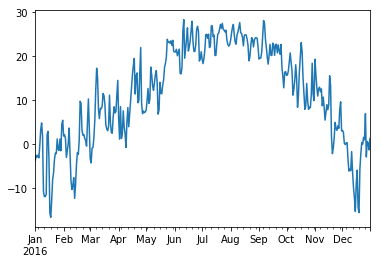

In [6]:
weather2016.temperature.resample('D').mean().plot()

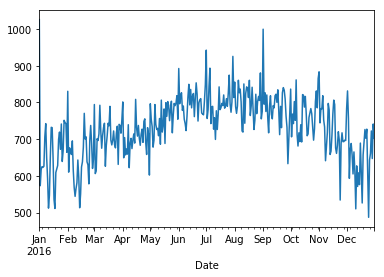

In [9]:
crimes2016['Primary Type'].resample('D').count().plot()

Let's simplify these variables

In [20]:
daily_temperature = weather2016.temperature.resample('D').mean()
daily_crimes = crimes2016['Primary Type'].resample('D').count()
daily_crimes.name = 'crimes'

We could plot them on the same graph

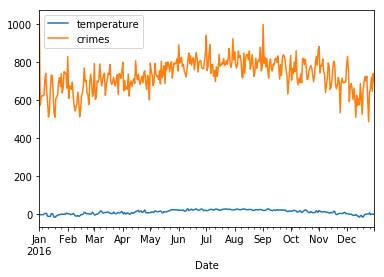

In [21]:
daily_temperature.plot()
daily_crimes.plot()
plt.legend()

But due to different y-axis dimensions, the data is not very readable (and these types of plots generally aren't recommended if we're plotting different data).

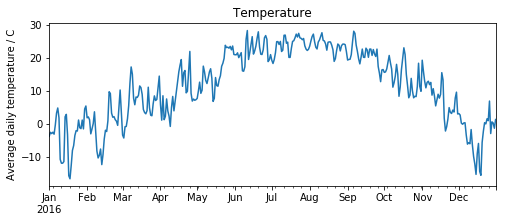

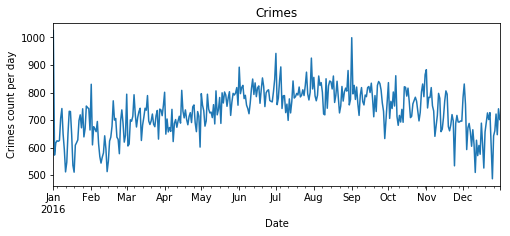

In [36]:
figsize = (8,3)
plt.figure()
daily_temperature.plot(title='Temperature', figsize=figsize)
plt.ylabel('Average daily temperature / C')
plt.figure()
daily_crimes.plot(title='Crimes', figsize=figsize)
plt.ylabel('Crimes count per day')
plt.show()

We can use a rolling average function to "smoothen" out the curve and see the trend change throught a year.

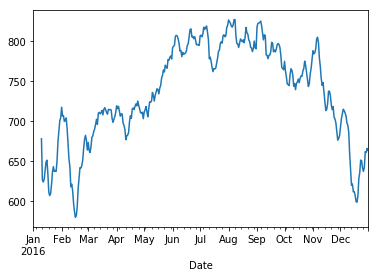

In [61]:
daily_crimes.rolling(10).mean().plot()

… and why not use our knowledge of interactive widgets to make the moving window size adjustable.

In [67]:
from ipywidgets import interact, widgets

@interact(periods=widgets.IntSlider(min=10,max=100,step=10,value=50))
def plot_moving_average(periods=50):
    figsize = (8,3)
    plt.figure()
    daily_temperature.rolling(periods).mean().plot(title='Temperature', figsize=figsize)
    plt.ylabel('Average daily temperature / C')
    plt.figure()
    daily_crimes.rolling(periods).mean().plot(title='Crimes', figsize=figsize)
    plt.ylabel('Crimes count per day')
    plt.show()

interactive(children=(IntSlider(value=50, description='periods', min=10, step=10), Output()), _dom_classes=('widget-interact',))

## Computing the correlation

It's easier to visualise and analyse the data correlation if we combine temperatures and crimes into a single DataFrame.

In [70]:
daily_df = pd.DataFrame({'crimes': daily_crimes, 'temperatures': daily_temperature})
daily_df.head()

,crimes,temperatures
Date,,
2016-01-01,1025,-3.726667
2016-01-02,573,-2.488333
2016-01-03,617,-2.886667
2016-01-04,625,-2.463333
2016-01-05,623,-3.066250


Now we can generate a scatter plot showing both variables as dimensions with a single command.

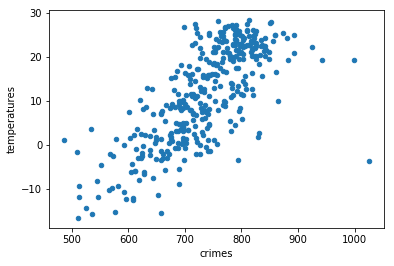

In [72]:
daily_df.plot(kind='scatter', x='crimes', y='temperatures')

This scatter plot pretty cleanly shows that there is some correlation between temperature and the number of crimes. Let's compute it.

In [76]:
daily_df.corr() # Pearson correlation by default – the standard correlation coefficient

,crimes,temperatures
crimes,1.000000,0.734824
temperatures,0.734824,1.000000


Finally, let's compute a linear regression model of the correlation and plot it over our scatter plot.

In [ ]:
import statsmodels.api as sm

# regress "expression" onto "motifScore" (plus an intercept)
model = sm.OLS(daily_df.temperaturemotif.expression, sm.add_constant(motif.motifScore))
p = model.fit().params

# generate x-values for your regression line (two is sufficient)
x = np.arange(1, 3)

# scatter-plot data
ax = df.plot(x='motifScore', y='expression', kind='scatter')

# plot regression line on the same axes, set x-axis limits
ax.plot(x, p.const + p.motifScore * x)
ax.set_xlim([1, 2])

## Hourly data

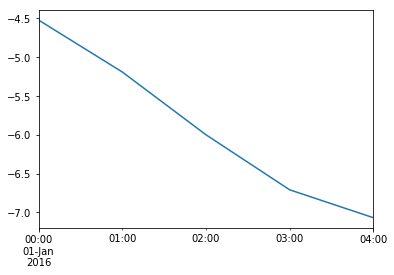

In [11]:
weather2016.temperature.head().plot()

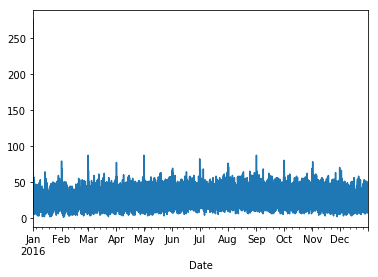

In [8]:
hourly_crimes = crimes2016['Primary Type'].resample('1h').count()

hourly_crimes2016 = hourly_crimes['2016']
hourly_crimes2016.plot()